# STOR 566, Homework 1
### Instructor: Yao Li
### Keywords: optimization
### Due date: Sep 07, 11:55pm
### **Submission Instruction**

- Please download this script and use it to answer the questions in the homework. 
- For submission, please include your code, code output and answers in the script and submit the ipynb file on sakai.
- Please don't modify existing cells. But you can add cells between the exercise statements.
- To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language. For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


In [1]:
import os
import time
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')
root_path = 'gdrive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem 1 (10 points)

Prove whether the following functions are convex or not.
- (a) (5 points) $f(x_1,x_2)=(x_1x_2-1)^2$, where $x_1, x_2\in \mathbb{R}$.
- (b) (5 points) $f(\mathbf{w}_1, \mathbf{w}_2)=\|\mathbf{w}_1-\mathbf{w}_2\|^2_2$,  where $\mathbf{w}_1, \mathbf{w}_2\in \mathbb{R}^2$.


#### Solution of Problem 1 (a):

$f(x_1,x_2)=x_1^2x_2^2-2x_1x_2+1$ <br>
$\frac{∂^2f}{∂x_1^2} = \frac{∂f}{∂x_1}(\frac{∂f}{∂x_1}) = \frac{∂f}{∂x_1}(2x_1x_2^2-2x_2) = 2x_2^2$ <br>
Therefore, $f(x_1,x_2)$ is twice-differentiable. <br>

Hessian matrix $A = \begin{bmatrix} \frac{∂^2f}{∂x_1^2} & \frac{∂^2f}{∂x_1∂x_2} \\ \frac{∂^2f}{∂x_2∂x_1} & \frac{∂^2f}{∂x_2^2} \end{bmatrix} = \begin{bmatrix} 2{x_2}^2 & 4x_1x_2 - 2 \\ 4x_1x_2 - 2 & 2{x_1}^2 \end{bmatrix}$ <br>
Then, for matrix $n = \begin{bmatrix} n_1 \\ n_2 \end{bmatrix}$, $n^T A n = \begin{bmatrix} n_1 & n_2 \end{bmatrix} * \begin{bmatrix} 2{x_2}^2 & 4x_1x_2 - 2 \\ 4x_1x_2 - 2 & 2{x_1}^2 \end{bmatrix} * \begin{bmatrix} n_1 \\ n_2 \end{bmatrix} = 4{x_2}^2{n_1}^2 + 8x_1x_2n_1n_2-4n_1n_2$ <br>
Since we could select any $n$, we can find that $n^T A n$ will not always be greater or equal to 0.

Therefore, Hessian matrix $A$ is not positive semidefinite.

Hence, $f(x_1,x_2)$ is not convex (by Theorem 2 of convex).

#### Answer: Not convex.



#### Solution of Problem 1 (b):

Since $\mathbf{w_1}, \mathbf{w_2} \in R^2, \mathbf{w_1}-\mathbf{w_2} \in \mathbb{R}^2$. <br>
Let $\mathbf{w_1}-\mathbf{w_2} = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}$ where $a_1,a_2 \in \mathbb{R}$.

Then, $f(\mathbf{w_1}, \mathbf{w_2}) = \|\mathbf{w_1}-\mathbf{w_2}\|_2^2 = {a_1}^2 + {a_2}^2$.

Therefore, this question is converted to identify whether $f(a_1,a_2) = {a_1}^2 + {a_2}^2$ ($a_1,a_2 \in \mathbb{R}$) is convex.

Hessian matrix $A = \begin{bmatrix} \frac{∂^2f}{∂a_1^2} & \frac{∂^2f}{∂a_1∂a_2} \\ \frac{∂^2f}{∂a_2∂a_1} & \frac{∂^2f}{∂a_2^2} \end{bmatrix} = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$

Then, for matrix $n = \begin{bmatrix} n_1 \\ n_2 \end{bmatrix}$, $n^T A n = \begin{bmatrix} n_1 & n_2 \end{bmatrix} * \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} * \begin{bmatrix} n_1 \\ n_2 \end{bmatrix} = 2{n_1}^2+2{n_2}^2$ <br>
For any $n$, $n^T A n$ is always greater or equal to 0.

Therefore, Hessian matrix $A$ is positive semidefinite.

Hence, $f(\mathbf{w_1}, \mathbf{w_2})$ is convex (by Theorem 2 of convex).

#### Answer: Convex.

## Problem 2 (10 points)

Identify stationary points for $f(x) = 2x_1 +12x_2 +x^2_1 -3x^2_2$? Are they local minimum/maximum; global minimum/maximum or saddle points? Why?

#### Answer: Stationary point for $f(x)$ is $(-1,2)$, which is a saddle point.

Stationary points for $f(x)$ is $(-1,2)$ i.e. $(x_1=-1,x_2=2)$.

$\frac{∂f}{∂x_1} = 2 + 2x_1= 0$ &rarr; $x_1 = -1$ <br>
$\frac{∂f}{∂x_2} = 12 - 6x_2 = 0$ &rarr; $x_2 = 2$

According to the 3-D graph and second partial derivative test, this stationary point is a saddle point.

Interpretation: Second Partial Derivative Test: $D = \frac{∂^2f}{∂x_1^2}*\frac{∂^2f}{∂x_2^2}-(\frac{∂^2f}{∂x_1*∂x_2})^2$ <br>
$D>0$: if $\frac{∂^2f}{∂x_1^2} > 0$, local minimum; if $\frac{∂^2f}{∂x_1^2} < 0$, local maximum; <br>
$D<0$: saddle point; <br>
$D=0$: inconclusive (local min/max or saddle point).

$D = \frac{∂f}{∂x_1} (\frac{∂f}{∂x_1}) + \frac{∂f}{∂x_2} (\frac{∂f}{∂x_2}) - \frac{∂f}{∂x_2} (\frac{∂f}{∂x_1}) = \frac{∂(2+2x_1)}{∂x_1} * \frac{∂(12-6x_2)}{∂x_2} - \frac{∂(2+2x_1)}{∂x_2} = 2 * (-6) - 0 = -12 < 0$

Therefore, this point is a saddle point.

## Problem 3 (80 points)

Given training data $\{\mathbf{x}_i, y_i\}^n_{i=1}$, each $x_i\in \mathbb{R}^d$ and $y_i \in \{+1, -1\}$, we try to solve the following logistic regression problem by gradient descent:
\begin{align}
\min_{\mathbf{w}\in R^d}\left\{\frac{1}{n}\sum_{i=1}^n\log(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i})+\frac{1}{2}\|\mathbf{w}\|^2_2  \right\} := f(\mathbf{w}).
\end{align}
Test the algorithm using the 'heart scale' dataset with $n = 270$ and $d = 13$: the matrix $\mathbf{X}$ is stored in the file 'X$\_$heart', and the vector $\mathbf{y}$ is stored in the file 'y$\_$heart'. ('X$\_$heart' contains $n$ lines, each line stores a vector $\mathbf{x}_i$ with $d$ real numbers. 'y$\_$heart' contains the $\mathbf{y}$ vector.)

In [3]:
## Please implement data loading yourself

In [4]:
## Load data:
X = pd.read_csv("/content/drive/MyDrive/HW1/X_heart", header=None)
y = pd.read_csv("/content/drive/MyDrive/HW1/y_heart", header=None)

X.columns = ['col']
X = X.col.str.extract('([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+)', expand=True)
X = X.apply(pd.to_numeric)

X = X.to_numpy()
y = y.to_numpy()

### (a) (5 points) Compute the gradient of $f(\mathbf{w})$ w.r.t. $\mathbf{w}$.

Answer: \begin{align}
\triangledown f(\mathbf{w}) = -\frac{1}{n}\sum_{i=1}^n\frac{y_i\mathbf{x}_i}{1+e^{y_i\mathbf{w}^T\mathbf{x}_i}}+\mathbf{w}.
\end{align}

### (b) (30 points) Implement the gradient descent algorithm with a fixed step size $\eta$. Find a small $\eta_1$ such that the algorithm converges. Increase the step size to $\eta_2$ so the algorithm cannot converge. Run 50 iterations and plot the iteration versus $\log(f(\mathbf{w}^k) -f(\mathbf{w}^*))$ plot for $\eta_1$ and $\eta_2$. In practice it is impossible to get the exact optimal solution $\mathbf{w}^*$, so use the minimum value you computed as $f(\mathbf{w}^*)$ when you plot the figure. Report the $f(\mathbf{w}^*)$ value you used for generating the plots.

In [5]:
## Implementation of GD
## You can insert more code chunks and text cells between (b) and (c) if you want to.
## Your code:

In [6]:
def GD(w):
  gdd = np.zeros(13).reshape(13, 1)
  for i in range (0,270):
    gdd = gdd - 1/270 * y[i] * X[i].reshape(13,1) / (1 + np.exp(y[i] * np.transpose(w) @ X[i].reshape(13,1)))
  return gdd

def f(w):
  f = 0
  for i in range (0,270):
    f = f + math.log(1 + math.exp(-1 * y[i] * np.transpose(w) @ X[i].reshape(13,1)))
  return f/270 + 1/2*np.linalg.norm(w)**2

Plot of a small step size $\eta_1$: 0.01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


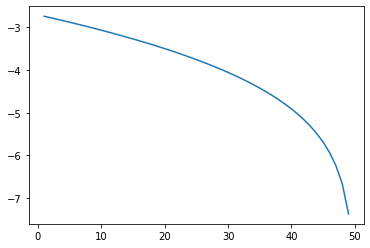

In [7]:
eta = 0.01
w = np.zeros(13).reshape(13, 1)
flist = np.zeros(50)

for i in range (50):
  flist[i] = f(w)
  w = w - eta * GD(w)

fxstar1 = min(flist)
ferror = flist - fxstar1
logflist = np.log(ferror)

plt.plot(list(range(1,51)), logflist)

Plot of a small step size $\eta_2$: 0.05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


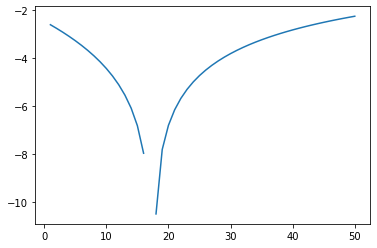

In [8]:
eta = 0.05
w = np.zeros(13).reshape(13, 1)
flist = np.zeros(50)

for i in range (50):
  flist[i] = f(w)
  w = w - eta * GD(w)

fxstar2 = min(flist)
ferror = flist - fxstar2
logflist = np.log(ferror)

plt.plot(list(range(1,51)), logflist)

The $f(\mathbf{x}^*)$ value used is: 0.6283854564926143 for $\eta=0.01$, and 0.6187490694163746 for $\eta=0.05$

In [9]:
print(fxstar1)
print(fxstar2)

0.6283854564926143
0.6187490694163746


### (c) (5 points) Write down the pseudo code of gradient descent with backtracking line search ($\sigma=0.01$).

Pseudo code:

Initialize the weights $\mathbf{w}_0$ <br>
For t = 1, 2, ... , 50 <br>
    &emsp; Compute the gradient $\mathbf{d} = -\triangledown f(\mathbf{w})$ <br>
    &emsp; For $\alpha = \alpha_0, \alpha_0/2, \alpha_0/4, ... $<br>
    &emsp; &emsp; Break if $f(\mathbf{w} + \alpha \mathbf{d}) ≤ f(\mathbf{w}) + 0.01 \alpha \triangledown f(\mathbf{w})^T \mathbf{d} $ <br>
    &emsp; Update $\mathbf{w} ← \mathbf{w} + \alpha \mathbf{d}$ <br>
    &emsp; Return the final solution $\mathbf{w}$

$\triangledown f(\mathbf{w}) = -\frac{1}{n}\sum_{i=1}^n\frac{y_i\mathbf{x}_i}{1+e^{y_i\mathbf{w}^T\mathbf{x}_i}}+\mathbf{w}$

### (d) (20 points) Implement the gradient descent algorithm with backtracking line search ($\sigma=0.01$). Plot the same iteration versus $\log(f(\mathbf{w}^k) -f(\mathbf{w}^*))$ plot.

In [10]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:

In [11]:
def BTLS(flist):
  w = np.zeros(13).reshape(13, 1)
  alpha = 0.1
  for i in range (50):
    flist[i] = f(w)
    d = -GD(w)
    while (f(w + alpha * d) > f(w) + 0.01 * alpha * np.transpose(GD(w)) @ d):
      alpha = alpha / 2
    w = w + alpha * d
  return [w, flist]

In [12]:
fzeros = np.zeros(50)
[w, flist] = BTLS(fzeros)
fxstar = min(flist)
ferror = flist - fxstar
logflist = np.log(ferror)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


The Plot:

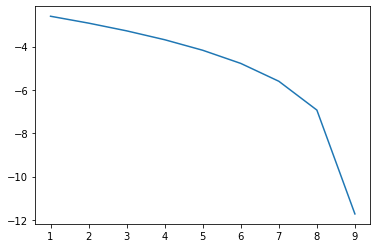

In [13]:
plt.plot(list(range(1,51)), logflist)

### (e) (20 points) Test your implementation (gradient descent with backtracking line search) on a larger dataset 'epsilonsubset'. Plot the same iteration vs error plot.

In [14]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:

In [15]:
X = pd.read_csv("/content/drive/MyDrive/HW1/x_epsilonsubset", header = None)
y = pd.read_csv("/content/drive/MyDrive/HW1/y_epsilonsubset", header = None)

In [16]:
size = len(X.iloc[0][0].split())
Xzeros = np.zeros((len(X), size))
for i in range(len(X)):
  Xzeros[i]= X.iloc[0][0].split()

X = Xzeros
y = y.to_numpy()

In [20]:
def GD(w):
  gdd = np.zeros(len(X[0])).reshape(len(X[0]), 1)
  for i in range (0,len(X)):
    gdd = gdd - 1/len(X) * y[i] * X[i].reshape(len(X[0]),1) / (1 + np.exp(y[i] * np.transpose(w) @ X[i].reshape(len(X[0]),1)))
  return gdd

def f(w):
  f = 0
  for i in range (0,len(X)):
    f = f + math.log(1 + math.exp(-1 * y[i] * np.transpose(w) @ X[i].reshape(len(X[0]),1)))
  return f/len(X) + 1/2*np.linalg.norm(w)**2

def BTLS(flist):
  w = np.zeros(len(X[0])).reshape(len(X[0]), 1)
  alpha = 0.1
  for i in range (50):
    flist[i] = f(w)
    d = -GD(w)
    while (f(w + alpha * d) > f(w) + 0.01 * alpha * np.transpose(GD(w)) @ d):
      alpha = alpha / 2
    w = w + alpha * d
  return [w, flist]

In [ ]:
fzeros = np.zeros(50)
[w, flist] = BTLS(fzeros)
fxstar = min(flist)
ferror = flist - fxstar
logflist = np.log(ferror)

The Plot:

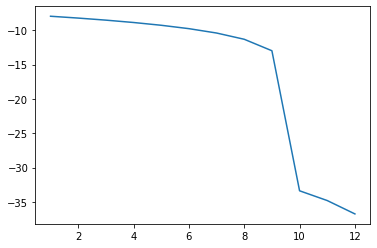

In [19]:
plt.plot(list(range(1,51)), logflist)